# Pokemon Data Visualization

In [2]:
import pandas as pd 
from collections import defaultdict
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [3]:
plt.style.use('ggplot')

df = pd.read_csv("dataset.csv")



new_df = df
new_df.drop( ['#'], 1, inplace=True )
new_df.drop( ['Type 2'], 1, inplace=True )
new_df.drop( ['Generation'], 1, inplace=True )
new_df.drop( ['Legendary'], 1, inplace=True )

print(new_df.head())

                    Name Type 1  Total  HP  Attack  Defense  Sp. Atk  Sp. Def  \
0              Bulbasaur  Grass    318  45      49       49       65       65   
1                Ivysaur  Grass    405  60      62       63       80       80   
2               Venusaur  Grass    525  80      82       83      100      100   
3  VenusaurMega Venusaur  Grass    625  80     100      123      122      120   
4             Charmander   Fire    309  39      52       43       60       50   

   Speed  
0     45  
1     60  
2     80  
3     80  
4     65  


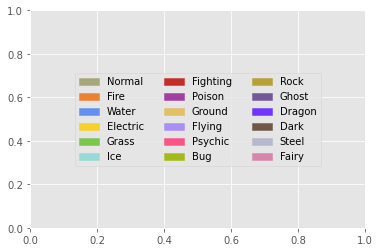

In [6]:
Colors = dict()
Colors['Normal'] = '#A8A77A'
Colors['Fire'] = '#EE8130'
Colors['Water'] = '#6390F0'
Colors['Electric'] = '#F7D02C'
Colors['Grass'] = '#7AC74C'
Colors['Ice'] = '#96D9D6'
Colors['Fighting'] = '#C22E28'
Colors['Poison'] = '#A33EA1'
Colors['Ground'] = '#E2BF65'
Colors['Flying'] = '#A98FF3'
Colors['Psychic'] = '#F95587'
Colors['Bug'] = '#A6B91A'
Colors['Rock'] = '#B6A136'
Colors['Ghost'] = '#735797'
Colors['Dragon'] = '#6F35FC'
Colors['Dark'] = '#705746'
Colors['Steel'] = '#B7B7CE'
Colors['Fairy'] = '#D685AD'


patch = []
for i in Colors:
	patch.append( mpatches.Patch(color=Colors[i], label=i) )
plt.legend(loc=10, ncol=3, borderaxespad=0., handles=patch)
#plt.show()

In [7]:
Attack = defaultdict(list)
Defense = defaultdict(list)
HP = defaultdict(list) 
Speed = defaultdict(list) 
Type_Strength = defaultdict(list)

for index,row in new_df.iterrows():
	Attack[row['Type 1']].append( (row['Attack'] + row ['Sp. Atk'])/float(2) )
	Defense[row['Type 1']].append( (row['Defense'] + row ['Sp. Def'])/float(2) )
	HP[row['Type 1']].append( row['HP'] )
	Speed[row['Type 1']].append( row['Speed'] )

	Type_Strength[row['Type 1']].append( row['Total'] )

Types = []
for i in Attack:
	Types.append(i)

3D Scatter Plot of all Pokemons
-------------------------------

     1. X-axis: Attack
     2. Y-axis: Defense
     3. Z- axis: HP
 
 ![](https://lh3.googleusercontent.com/-HaEPss6ZoLA/WOkuy0jfqxI/AAAAAAAABjY/IT1PtlgN_gYYl39ebuvKatovNhyrg_LdwCLcB/s0/3D.png "3D.png")
 

----------

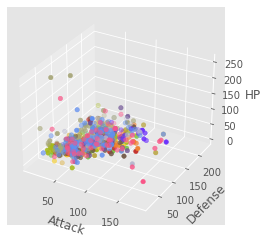

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in Types:
	ax.scatter( Attack[i], Defense[i], HP[i], c=Colors[i] )

ax.set_xlabel('Attack')
ax.set_ylabel('Defense')
ax.set_zlabel('HP')

plt.show()

Comparison Of Attack, Defense, HP and Speed
-------------------------------------------

 

![](https://lh3.googleusercontent.com/-i7kxITcW-T4/WOtmbR6wKqI/AAAAAAAABlU/yfhCFLDRsZcNfSrmYP2dEniRPuiTN-YUQCLcB/s0/Main+bar.png "Main bar.png")

----------

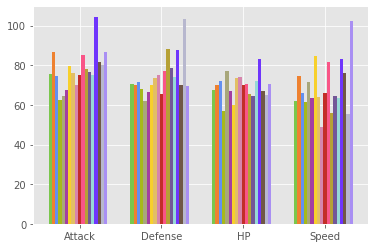

In [9]:
for i in Types:
	Attack[i] = sum(Attack[i]) / float(len(Attack[i]))	
	Defense[i] = sum(Defense[i]) / float(len(Defense[i]))
	HP[i] = sum(HP[i]) / float(len(HP[i]))
	Speed[i] = sum(Speed[i]) / float(len(Speed[i]))


values = [HP[i] for i in HP]

ind = np.arange(4)  		# the x locations for the groups
width = 0.04      		# the width of the bars

fig, ax = plt.subplots()


num=0
for i in Types:
	ax.bar(ind + num*width, [Attack[i], Defense[i], HP[i], Speed[i]], width, color=Colors[i]) 
	num+=1

# add some text for labels, title and axes ticks
ax.set_xticks(ind + num*width / 2)
ax.set_xticklabels(('Attack', 'Defense', 'HP', 'Speed'))

plt.show()

Average Power comparison
------------------------

 

 - Grass Type, Fire Type and Water Type Pokemons.
![](https://lh3.googleusercontent.com/-lBRYey9Tr_s/WOksg-WEHzI/AAAAAAAABic/ZnYN7osc7MsYLiRIYALN9VGpphTEXjwbQCLcB/s0/figure_1-1.png "figure_1-1.png")


 - Dragon, Flying, Steel, Rock, Ice Type comparison
![](https://lh3.googleusercontent.com/-FavMT9_vBQM/WOktHIn3qpI/AAAAAAAABio/AsinylQFS2kzBeFVLcWs2piKSV3JzG4sQCLcB/s0/figure_2.png "figure_2.png")


 - Electric, Bug, Normal, Ground, Fighting Type comparison
![](https://lh3.googleusercontent.com/-cm2iKVDoo2I/WOkt5TUSqoI/AAAAAAAABi4/MeNPemFYWPomSywWqfF70u_-MjoegOQEgCLcB/s0/figure_3.png "figure_3.png")


 - Ghost, Dark, Psychic, Fairy, Poison Type comparison
![](https://lh3.googleusercontent.com/-i6Cy6Zora_w/WOkuVNWlLhI/AAAAAAAABjA/pXhe4VHbpioa-OQUX1Eu57FK-GeLSjmFwCLcB/s0/figure_4.png "figure_4.png")


----------

Grass     421.14285714285717
Fire     458.0769230769231
Water     430.45535714285717
Bug     378.92753623188406
Normal     401.68367346938777
Poison     399.14285714285717
Electric     443.40909090909093
Ground     437.5
Fairy     413.1764705882353
Fighting     416.44444444444446
Psychic     475.94736842105266
Rock     453.75
Ghost     439.5625
Ice     433.4583333333333
Dragon     550.53125
Dark     445.741935483871
Steel     487.7037037037037
Flying     485.0


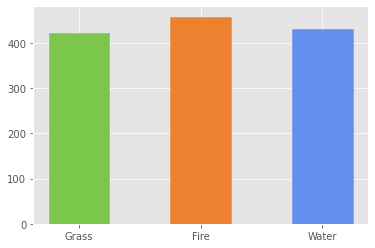

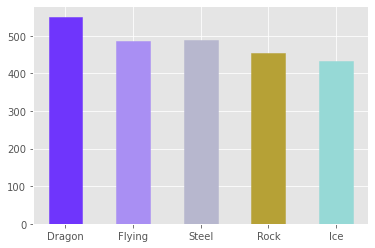

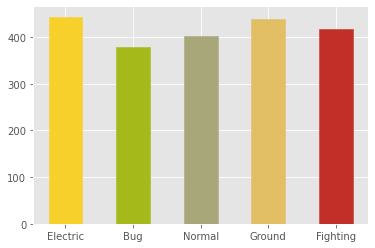

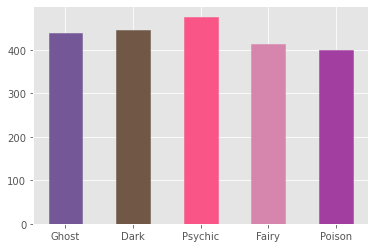

In [10]:
for i in Type_Strength:
	Type_Strength[i] = sum(Type_Strength[i]) / float(len(Type_Strength[i]))	
	print(i,"   ",Type_Strength[i])

Xloc = np.array( range(3) )
labels = ['Grass', 'Fire', 'Water']
values = [Type_Strength[i] for i in labels]
width = 0.5

barlist = plt.bar( Xloc, values, width=width )
barlist[0].set_color(Colors[labels[0]])
barlist[1].set_color(Colors[labels[1]])
barlist[2].set_color(Colors[labels[2]])
plt.xticks( Xloc, labels)
plt.show()



Xloc = np.array( range(5) )
labels = ['Dragon', 'Flying', 'Steel', 'Rock', 'Ice']
values = [Type_Strength[i] for i in labels]
width = 0.5

barlist = plt.bar( Xloc, values, width=width )
barlist[0].set_color(Colors[labels[0]])
barlist[1].set_color(Colors[labels[1]])
barlist[2].set_color(Colors[labels[2]])
barlist[3].set_color(Colors[labels[3]])
barlist[4].set_color(Colors[labels[4]])
plt.xticks( Xloc, labels)
plt.show()



Xloc = np.array( range(5) )
labels = ['Electric', 'Bug', 'Normal', 'Ground', 'Fighting']
values = [Type_Strength[i] for i in labels]
width = 0.5

barlist = plt.bar( Xloc, values, width=width )
barlist[0].set_color(Colors[labels[0]])
barlist[1].set_color(Colors[labels[1]])
barlist[2].set_color(Colors[labels[2]])
barlist[3].set_color(Colors[labels[3]])
barlist[4].set_color(Colors[labels[4]])
plt.xticks( Xloc, labels)
plt.show()


Xloc = np.array( range(5) )
labels = ['Ghost', 'Dark', 'Psychic', 'Fairy', 'Poison']
values = [Type_Strength[i] for i in labels]
width = 0.5

barlist = plt.bar( Xloc, values, width=width )
barlist[0].set_color(Colors[labels[0]])
barlist[1].set_color(Colors[labels[1]])
barlist[2].set_color(Colors[labels[2]])
barlist[3].set_color(Colors[labels[3]])
barlist[4].set_color(Colors[labels[4]])
plt.xticks( Xloc, labels)
plt.show()

**Part 2**
----------
## Pokemon Stats Comparison ##

**Compares Stats of any 2 Pokemons.**

The stats compared are:

 1. Attack
 2. Defence
 3. Special Attack
 4. Special Defence
 5. HP
 6. Speed

----------
Python Program to compare pokemon stats and

 - Plot pie chart for the 2 Pokemons.
 - Radar plot for the 2 Pokemons.
 - A bar graph to compare stats.

This program makes use of libraries such as:

 - Pandas
 - Matplotlib
 - Numpy

----------

#### Here, we will compare Mewtwo and Articuno.

In [12]:
#Pokemon1_name = input()
#Pokemon2_name = input()		#Taking Input for Pokemons to compare
				
Pokemon1_name = 'Mewtwo'	
Pokemon2_name = 'Articuno'

Pokemon1 = new_df.loc[ new_df['Name']==Pokemon1_name ]
Pokemon2 = new_df.loc[ new_df['Name']==Pokemon2_name ]

labels = 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'HP', 'Speed'

P1_data=[]
for i in labels:
	P1_data.append( int(Pokemon1[i]) )

P2_data=[]
for i in labels:
	P2_data.append( int(Pokemon2[i]) )

Pie chart for Pokemon Stats
-------------------------------
 ![](https://lh3.googleusercontent.com/-ta7Hz_fJXD4/WO6GYqyUbnI/AAAAAAAABnU/MuosfznEzRojC6p9W3l9T_IPXRn9l2OdACLcB/s0/pjimage+%25281%2529.jpg "pie.jpg")

----------

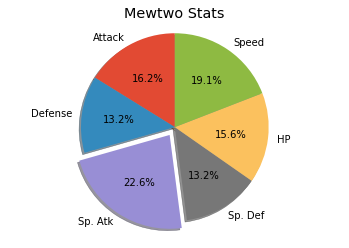

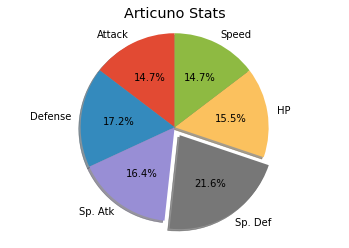

In [13]:
index = P1_data.index( max(P1_data) )

explode = [0, 0, 0, 0, 0]
explode.insert(index,0.1)


fig1, ax1 = plt.subplots()
ax1.pie(P1_data, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal') 
plt.title(Pokemon1_name+" Stats")
plt.show()



index = P2_data.index( max(P2_data) )

explode = [0, 0, 0, 0, 0]
explode.insert(index,0.1)


fig2, ax2 = plt.subplots()
ax2.pie(P2_data, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax2.axis('equal') 
plt.title(Pokemon2_name+" Stats")
plt.show()

Radar Plot for Mewtwo VS Articuno
-------------------------------------------

 
![](https://lh3.googleusercontent.com/-5I93_6xC9kU/WO6GEmuU3SI/AAAAAAAABnM/bMtXoMZuTdsKf7bdHvackRgIRFfW9zmbwCLcB/s0/rad.png "rad.png")

----------

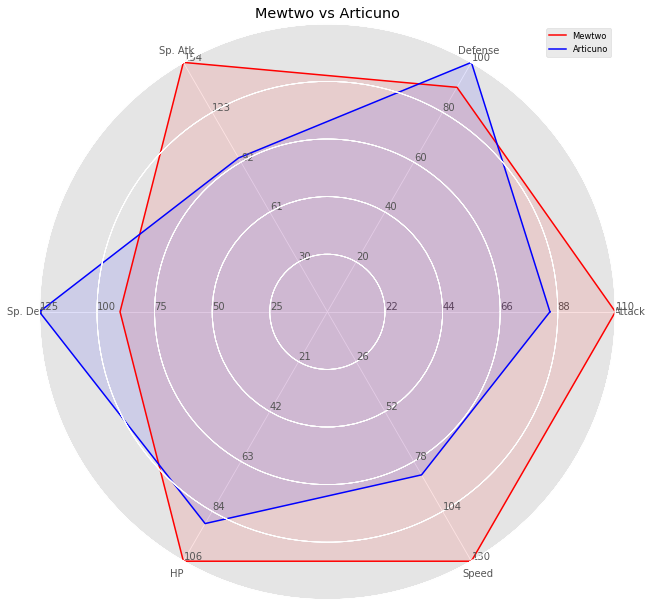

In [14]:
# A radar chart example: http://datascience.stackexchange.com/questions/6084/how-do-i-create-a-complex-radar-chart
def _scale_data(data, ranges):
    (x1, x2), d = ranges[0], data[0]
    return [(d - y1) / (y2 - y1) * (x2 - x1) + x1 for d, (y1, y2) in zip(data, ranges)]

class RaderChart():
    def __init__(self, fig, variables, ranges, n_ordinate_levels = 6):
        angles = np.arange(0, 360, 360./len(variables))

        axes = [fig.add_axes([0.1,0.1,0.8,0.8],polar = True, label = "axes{}".format(i)) for i in range(len(variables))]
        _, text = axes[0].set_thetagrids(angles, labels = variables)
        
        for txt, angle in zip(text, angles):
            txt.set_rotation(angle - 90)
        
        for ax in axes[1:]:
            ax.patch.set_visible(False)
            ax.xaxis.set_visible(False)
            ax.grid('off')
        
        for i, ax in enumerate(axes):
            grid = np.linspace(*ranges[i], num = n_ordinate_levels)
            grid_label = ['']+[str(int(x)) for x in grid[1:]]
            ax.set_rgrids(grid, labels = grid_label, angle = angles[i])
            ax.set_ylim(*ranges[i])
        
        self.angle = np.deg2rad(np.r_[angles, angles[0]])
        self.ranges = ranges
        self.ax = axes[0]

    def plot(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.plot(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

    def fill(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.fill(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

    def legend(self, *args, **kw):
        self.ax.legend(*args, **kw)



max_val=[]
for i in range(len(P1_data)):
    max_val.append( max(P1_data[i],P2_data[i]) )

ranges = [[2**-20, mv] for mv in max_val]



fig = plt.figure(figsize=(10, 10))
radar = RaderChart(fig, labels, ranges)

radar.plot(P1_data, color = 'r', label = Pokemon1_name)
radar.fill(P1_data, alpha = 0.1, color = 'r')
radar.legend(loc = 1, fontsize = 'small')

radar.plot(P2_data, color = 'b', label = Pokemon2_name)
radar.fill(P2_data, alpha = 0.1, color = 'b')
radar.legend(loc = 1, fontsize = 'small')

plt.title(Pokemon1_name+" vs "+Pokemon2_name)
plt.show()

Bar Graph for Mewtwo VS Articuno
------------------------

![](https://lh3.googleusercontent.com/-IXpSIRD9Hkg/WO6GnXKY9YI/AAAAAAAABnc/cYQEWz01zj8uMzSAvnFtyTHZA-QzhOZ6wCLcB/s0/bar.png "bar.png")
 

----------

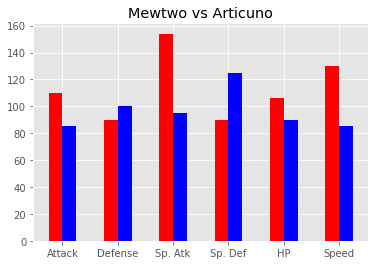

In [15]:
ind = np.arange(6)  		# the x locations for the groups
width = 0.25      			# the width of the bars

fig, ax = plt.subplots()

ax.bar(ind, P1_data, width, color='r') 
ax.bar(ind + width, P2_data, width, color='b') 

ax.set_xticks(ind + width / 2)
ax.set_xticklabels(labels)
plt.title(Pokemon1_name+" vs "+Pokemon2_name)
plt.show()